# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report

pd.set_option('display.max_columns', None)

In [2]:
try:
    df = pd.read_csv('diabetes_prediction_dataset.csv') 
except FileNotFoundError:
    print("You have to load the file to the directory before opening it.")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'hba1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [6]:
df.shape

(100000, 9)

In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


В числовых столбцах медиана близка к среднему. В бинарных столбцах 75% равны 0.

In [8]:
num_features = df.select_dtypes(include='number')

In [9]:
var_ = num_features.var().to_frame(name='var')
unique = num_features.nunique().to_frame(name='unique')
pd.concat([var_, unique], join='outer', axis=1)

,var,unique
age,507.008078,102
hypertension,0.069248,2
heart_disease,0.037866,2
bmi,44.046894,4247
hba1c_level,1.146339,18
blood_glucose_level,1657.152341,18
diabetes,0.077776,2


Высокая дисперсия по столбцам age и blood_glucose_level.

In [10]:
df.age.value_counts().sort_values()

age
0.08       36
0.16       59
0.40       66
1.00       83
0.48       83
         ... 
53.00    1542
48.00    1568
47.00    1574
51.00    1619
80.00    5621
Name: count, Length: 102, dtype: int64

Есть странные значения в виде неполных лет. Большое количество значений содержит возраст 80 лет.

Посмотрим столбцы blood_glucose_level и hba1c_level.

In [11]:
df.blood_glucose_level.value_counts().to_frame().sort_values(by='blood_glucose_level').reset_index()

,blood_glucose_level,count
0,80,7106
1,85,6901
2,90,7112
3,100,7025
4,126,7702
5,130,7794
6,140,7732
7,145,7679
8,155,7575
9,158,7026


In [12]:
df.hba1c_level.value_counts().to_frame().sort_values(by='hba1c_level').reset_index()

,hba1c_level,count
0,3.5,7662
1,4.0,7542
2,4.5,7585
3,4.8,7597
4,5.0,7471
5,5.7,8413
6,5.8,8321
7,6.0,8295
8,6.1,8048
9,6.2,8269


Оба столбца имеют по 18 значений и очень похоже распределены, скорее всего есть связь между уровнем гемоглобина и глюкозы.

In [13]:
IQR = num_features.quantile(0.25).to_frame(name='Q1')
IQR['Q3'] = num_features.quantile(0.75)
IQR['iqr'] = IQR['Q3'] - IQR['Q1']
IQR['ejections+'] = IQR['Q3'] + IQR['iqr'] * 1.5
IQR['ejections-'] = IQR['Q1'] - IQR['iqr'] * 1.5
IQR

,Q1,Q3,iqr,ejections+,ejections-
age,24.00,60.00,36.00,114.000,-30.000
hypertension,0.00,0.00,0.00,0.000,0.000
heart_disease,0.00,0.00,0.00,0.000,0.000
bmi,23.63,29.58,5.95,38.505,14.705
hba1c_level,4.80,6.20,1.40,8.300,2.700
blood_glucose_level,100.00,159.00,59.00,247.500,11.500
diabetes,0.00,0.00,0.00,0.000,0.000


Критических выбросов нет.
- Есть по столбцу bmi, все значения выше 38.505 и ниже 14.705 выбросы.
- И по столбцу blood_glucose_level значения выше 247.500.

In [14]:
df.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [15]:
cat_features = df.select_dtypes(include='object').columns
for col in cat_features:
    print(f'Столбец {100* (df[col].value_counts() / df.shape[0]).round(5)}', end='\n\n')

Столбец gender
Female    58.552
Male      41.430
Other      0.018
Name: count, dtype: float64

Столбец smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: count, dtype: float64



**Вывод:**
- Данные не содержат пропуски.
- Датасет состоит из 100 000 строк и 9 столбцов.
- Датасет содержит небольшие выбросы по 2 столбцам: blood_glucose_level и bmi.
- Столбец таргет - diabetes содержит 2 значения (1 и 0), более 75% данных имеют нулевое значение.
- Средний возраст (столбец age) пациента 42 года. Есть дробные значения возраста.
Дисперсия высокая, это говорит о разбросе данных.
- Столбцы hypertension и heart_disease содержат по 2 уникальных значения (1 и 0),
минимум 75% наблюдений имеют нулевое значение.
- Столбец bmi распределение близкое к нормальному. В нем большое количество (5% от размера датасета) уникальных значений.
Среднее значение - 27 (то есть в среднем в датасете  пациенты с избыточным весом).
- Столбец hba1c_level - на первый взгляд нормальное распределение, но значения находятся в промежутке от 3.5 до 9.
- Столбец blood_glucose_level, как и предыдущий, имеет 18 уникальных значений, но они находятся в промежутке от 80 до 300.
Между 75% квартилем и максимумом большой разрыв. Данные в столбце не распределены нормально.
- Столбец smoking_history содержит 6 уникальных значений, самое частое из них "нет информации" занимает 35% датасета.
- Столбец gender содержит 3 значения, значения Other менее 0.1% от датасета.



## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [16]:
print(f'Количество дубликатов: {df[df.duplicated()].shape[0]}')

Количество дубликатов: 3854


In [17]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [18]:
df.shape

(96146, 9)

ВОПРОС: можно ли вначале удалить дубликаты? они же мешают описательному анализу.

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [19]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
hba1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

В датасете нет пропусков.

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

Столбцы с двумя уникальными значениями 1 и 0 заменим на булевый тип.

In [20]:
bool_feat = ['hypertension', 'heart_disease', 'diabetes']
df[bool_feat] = df[bool_feat].astype('bool')

Для столбцов с целыми значениями подберем подходящий размер (для экономии памяти).

In [21]:
for el in num_features:
    for n_type in (np.int32, np.int16, np.int8):
        if (df[el] == df[el].astype(n_type)).sum() == len(df):
            df[el] = df[el].astype(n_type)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96146 entries, 0 to 96145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int8   
 3   heart_disease        96146 non-null  int8   
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   hba1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int16  
 8   diabetes             96146 non-null  int8   
dtypes: float64(3), int16(1), int8(3), object(2)
memory usage: 4.1+ MB


**Вывод:**

После предобработки датасет состоит из 96 146 строк и 9 столбцов, и не содержит пропусков.

Столбцы hypertension, diabetes, heart_disease содержат бинарные значения.
У столбцов bmi распределение близкое к нормальному.
У столбцов hba1c_level и blood_glucose_level возможна сильная корреляция.

ВОПРОС: можно ли указывать, какую работу планируется провести? И где это корректно указать?

С данными можно провести следующую работу:
- Столбец bmi можно разбить на категории, так как в нем большое количество уникальных значений.
- В cтолбце gender вероятно можно удалить или перезаполнить значения Other, если они не коррелируют с таргетом.
- В столбце age разобраться с не целыми значениями.
- Разобраться с выбросами.


## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

##### Гистограммы и диаграммы выбросов для числовых переменных.

Text(0.5, 0, 'возраст пациента')

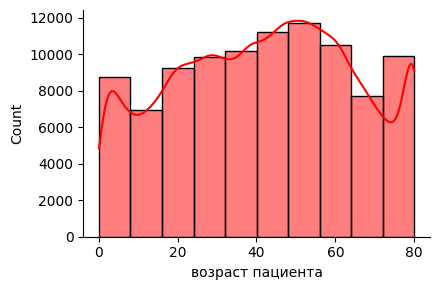

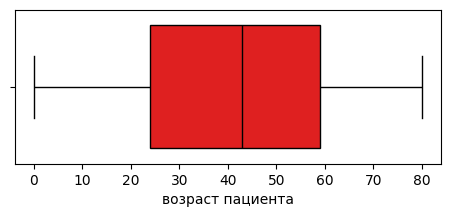

In [23]:
sns.displot(df, x='age', kde=True, bins=10, color='red', aspect=1.5, height=3)
plt.xlabel('возраст пациента')

plt.figure(figsize=(5.5,2))
sns.boxplot(df, x='age', color='red', linecolor='black')
plt.xlabel('возраст пациента')

*Вывод:* по графику видно, что распределение по возрасту не нормальное.

Есть всплески значений в районе 80 и 2-3 лет.

Можно сказать, что выборка по возрасту достаточно репрезентативная.

Text(0.5, 9.444444444444459, 'индекс жира')

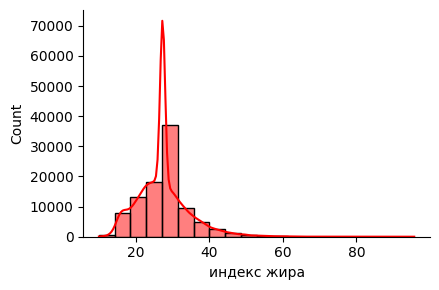

In [24]:
sns.displot(df, x='bmi', kde=True, bins=20, color='red', aspect=1.5, height=3)
plt.xlabel('индекс жира')

Text(0.5, 0, 'индекс жира')

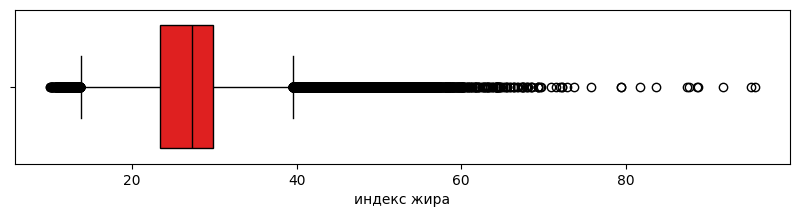

In [25]:
plt.figure(figsize=(10,2))
sns.boxplot(df, x='bmi', color='red', linecolor='black')
plt.xlabel('индекс жира')

In [26]:
display(f'Количество пациентов с индексом bmi > 70: {df.loc[df.bmi > 70].shape[0]}')
df.loc[(df.bmi > 70) & (df.diabetes == 1), ['diabetes']]

'Количество пациентов с индексом bmi > 70: 19'

,diabetes
4540,1
23921,1
28290,1
56933,1
69403,1
79551,1


*Вывод:* По коэффициенту bmi наблюдается распределение, близкое к нормальному.

Есть небольшие выбросы по значениям свыше 70-ти, но видно, что у четверти этих людей диабет.

Также видно, что треть значений имеет высокий показатель, то есть треть пациентов имеет избыточный вес.

<Axes: xlabel='blood_glucose_level'>

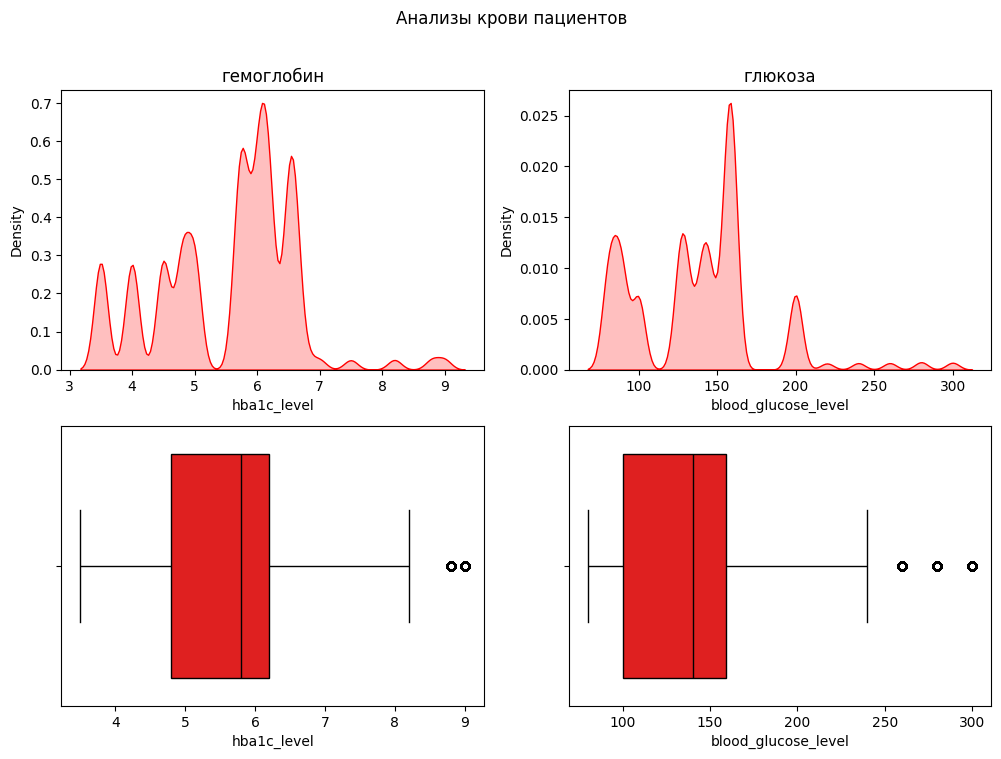

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Анализы крови пациентов')

sns.kdeplot(df.hba1c_level, ax=ax[0, 0], color='red', fill=True)
ax[0, 0].set_title('гемоглобин')
sns.kdeplot(df.blood_glucose_level, ax=ax[0, 1], color='red', fill=True)
ax[0, 1].set_title('глюкоза')
sns.boxplot(df, x='hba1c_level', ax=ax[1, 0], color='red', linecolor='black')
sns.boxplot(df, x='blood_glucose_level', ax=ax[1, 1], color='red', linecolor='black')

Вывод: данные графики схожи тем, что есть определенный всплекс и затем угасание в сторону больших значений признака.
Действительно, уровень гемоглобина в крови связан с уровнем глюкозы.

##### Диаграммы для категориальных переменных.

In [28]:
x = df.gender.value_counts()

Text(0.5, 0, 'пол пациента')

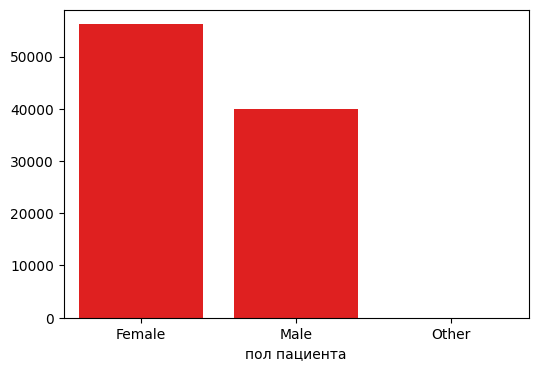

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(x=x.index, y=x.values, color='red')
plt.xlabel('пол пациента')

*Вывод:* пол пациента содержит три уникальных значения, женский пол превалирует.

Значения "другие" может означать отсутствие информации о поле пациента.

In [30]:
x = df.smoking_history.value_counts()

Text(0.5, 0, 'Курит ли пациент?')

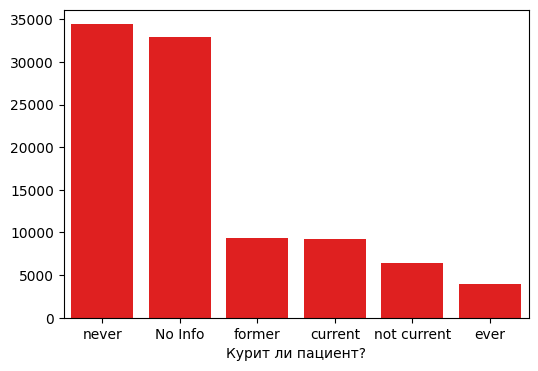

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x=x.index, y=x.values, color='red')
plt.xlabel('Курит ли пациент?')

*Вывод:* треть пациентов не курит, по трети пациентов нет информации.

ВОПРОС: стоит ли восстанавливать значения (например, линейной регрессией), если такое количество скажем так пропусков?

In [32]:
x = df.hypertension.value_counts()
x1 = df.heart_disease.value_counts()

Text(0.5, 1.0, 'болезни сердца')

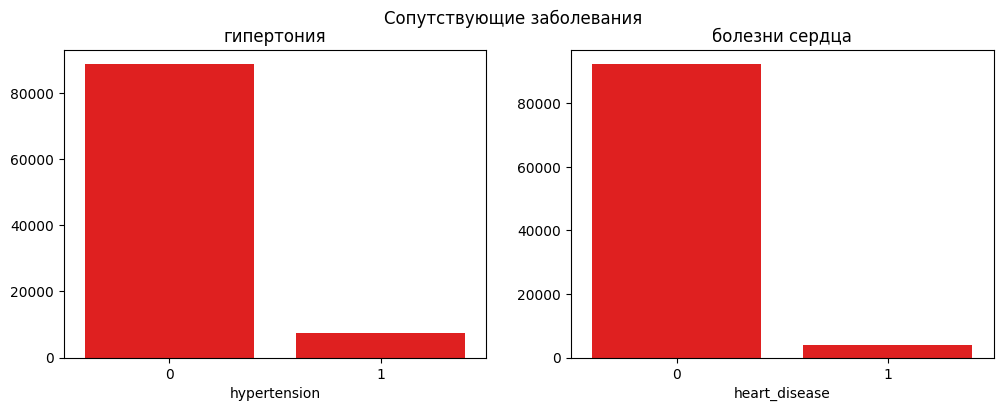

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Сопутствующие заболевания')

sns.barplot(x=x.index, y=x.values, ax=ax[0], color='red')
ax[0].set_title('гипертония')

sns.barplot(x=x1.index, y=x1.values, ax=ax[1], color='red')
ax[1].set_title('болезни сердца')

*Вывод*: у большей части пациентов нет данных сопутствующих заболеваний.

Гипертония у пациентов встречается чаще, чем болезни сердца.

In [34]:
x = df.diabetes.value_counts()

Text(0.5, 0, 'Диагноз диабет')

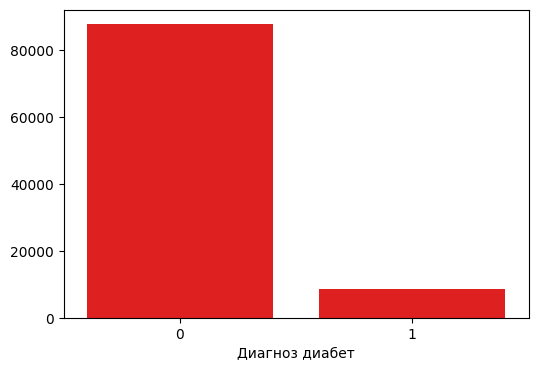

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(x=x.index, y=x.values, color='red')
plt.xlabel('Диагноз диабет')

*Вывод:* данные по таргету разбалансированы, пациентов с диагнозом диабет представлено в разы меньше, чем с отсутствием его.

##### Матрица корреляции признаков Phik

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'hba1c_level', 'blood_glucose_level', 'diabetes']


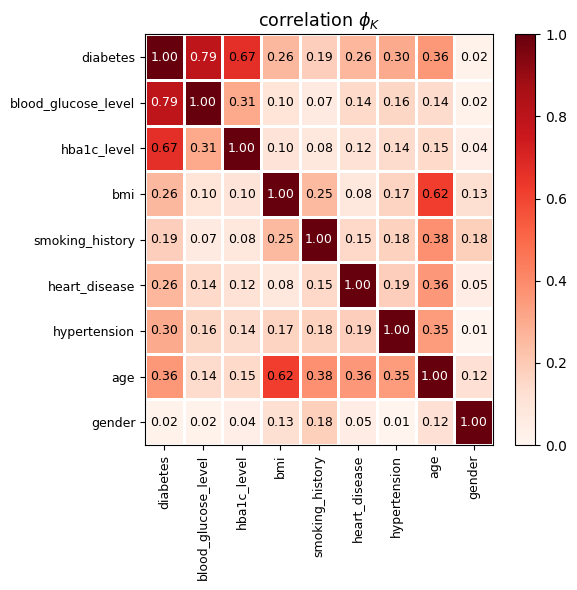

In [36]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Reds", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(6, 6))
plt.tight_layout()

*Вывод:* сущестует сильная корреляция между таргетом и показателями анализа крови: гемоглобин и глюкоза.

С остальными признаками (кроме пола) выраженная корреляция тоже присутствует.

Между признаками возраст и коэффициент жира высокая корреляция.

**Вывод:**
Классы целевой переменной "диабет" разбалансированы.

На наличие диагноза оказывают влияние все признаки, кроме пола пациента.

Особо влияют показатели глюкозы и гемоглобина, которые также связаны между собой.

Существует высокая корреляция между возрастом и коэффициентом жира, также возраст связан с сопутствующими заболеваниями.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

##### Гистограммы и ящики с усами для числовых признаков + таргет

Text(0.5, 1.0, 'возраст')

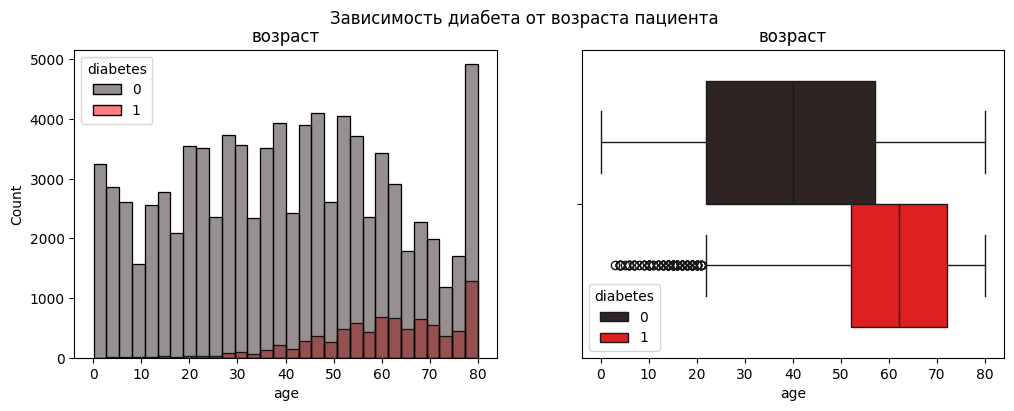

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Зависимость диабета от возраста пациента')

sns.histplot(df, x='age', hue='diabetes', ax=ax[0], bins=30, palette='dark:red')
ax[0].set_title('возраст')
sns.boxplot(df, x='age', hue='diabetes', ax=ax[1], palette='dark:red')
ax[1].set_title('возраст')

*Вывод:* зависимость диабета и возраста очевидна. После 30 лет увеличивается количество заболевших.

Text(0.5, 1.0, 'индекс жира')

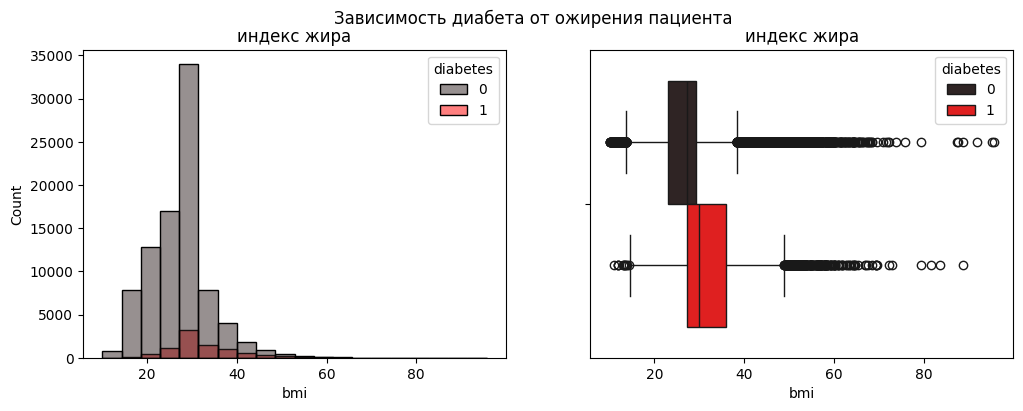

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Зависимость диабета от ожирения пациента')

sns.histplot(df, x='bmi', hue='diabetes', bins=20, ax=ax[0], palette='dark:red')
ax[0].set_title('индекс жира')
sns.boxplot(df, x='bmi', hue='diabetes', ax=ax[1], palette='dark:red')
ax[1].set_title('индекс жира')

*Вывод:* зависимость диабета от избыточного веса присутствует.

Text(0.5, 1.0, 'уровень глюкозы')

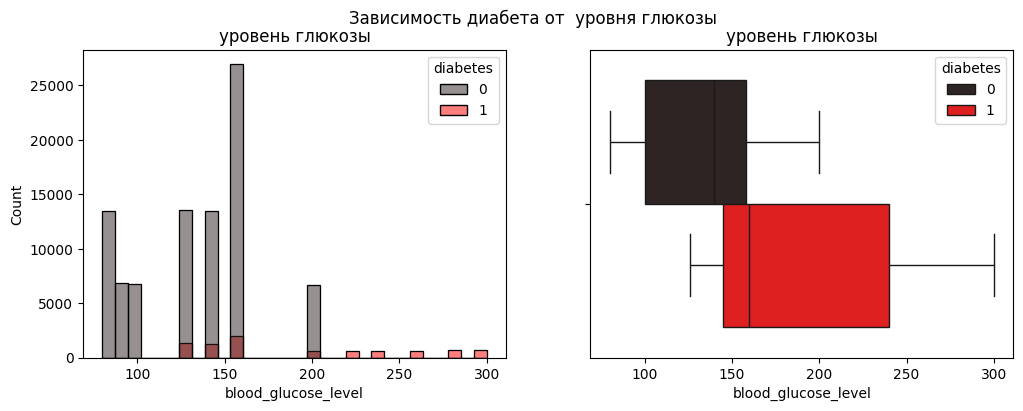

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Зависимость диабета от  уровня глюкозы')

sns.histplot(df, x='blood_glucose_level', hue='diabetes', ax=ax[0], bins=30, palette='dark:red')
ax[0].set_title('уровень глюкозы')
sns.boxplot(df, x='blood_glucose_level', hue='diabetes', ax=ax[1], palette='dark:red')
ax[1].set_title('уровень глюкозы')


Text(0.5, 1.0, 'гемоглобин')

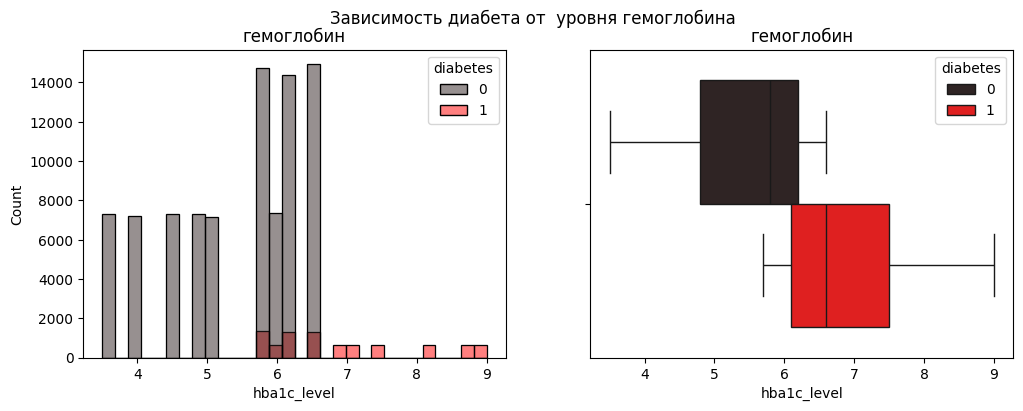

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Зависимость диабета от  уровня гемоглобина')

sns.histplot(df, x='hba1c_level', hue='diabetes', bins=30, ax=ax[0], palette='dark:red')
ax[0].set_title('гемоглобин')
sns.boxplot(df, x='hba1c_level', hue='diabetes', ax=ax[1], palette='dark:red')
ax[1].set_title('гемоглобин')

*Вывод*: по графикм связь между уровнем гемоглобина и глюкозы с диабетом очевидна.

##### Столбчатые диаграммы для категориальных и бинарных признаков + таргет

Text(0.5, 29.000000000000007, 'пол')

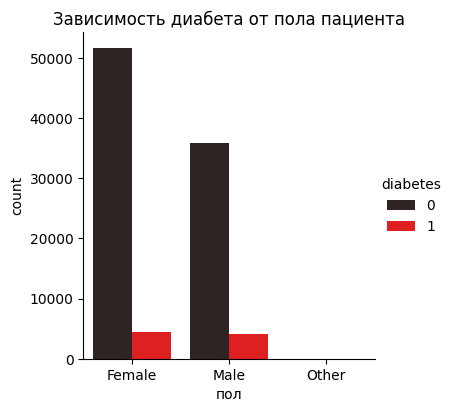

In [41]:
sns.catplot(x='gender', hue = 'diabetes', kind = 'count', data = df, palette='dark:red', height=4)
plt.title('Зависимость диабета от пола пациента')
plt.xlabel('пол')

In [42]:
df.loc[(df.gender == 'Female') & (df.diabetes == 1)].shape[0]

4447

In [43]:
df.loc[(df.gender == 'Male') & (df.diabetes == 1)].shape[0]

4035

*Вывод:* Небольшая зависимость диабета от пола все же есть, так как женщин в датасете больше, чем мужчин. а количество заболевших почти одинаково.

Text(0.5, 29.140624999999986, 'курит ли пациент?')

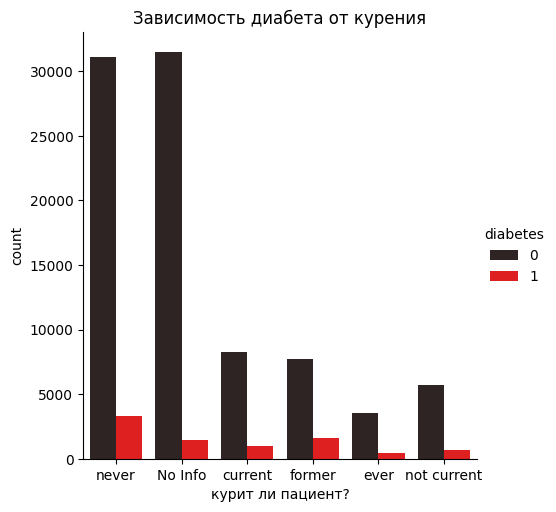

In [44]:
sns.catplot(x='smoking_history', hue = 'diabetes', kind = 'count', data = df, palette='dark:red', height=5)
plt.title('Зависимость диабета от курения')
plt.xlabel('курит ли пациент?')

*Вывод:* небольшая зависимость курения и диабета есть.  

Text(0.5, 29.140625000000007, 'болезни сердца')

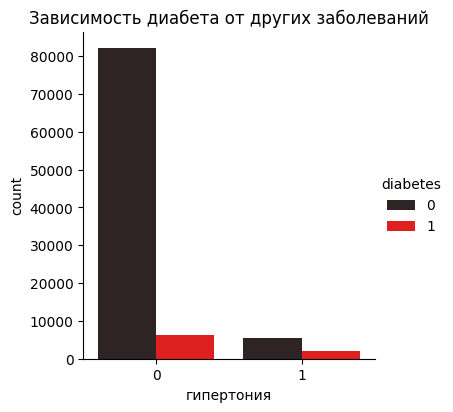

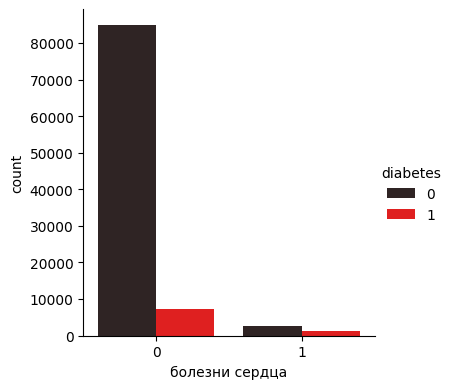

In [45]:
sns.catplot(x='hypertension', hue = 'diabetes', kind = 'count', data = df, palette='dark:red', height=4)
plt.title('Зависимость диабета от других заболеваний')
plt.xlabel('гипертония')

sns.catplot(x='heart_disease', hue = 'diabetes', kind = 'count', data = df, palette='dark:red', height=4)
plt.xlabel('болезни сердца')

In [46]:
hyper = df.loc[(df.hypertension == 1), ['diabetes']]
(hyper.value_counts() / len(hyper) * 100).round(2)


diabetes
0           72.04
1           27.96
Name: count, dtype: float64

In [47]:
heart = df.loc[(df.heart_disease == 1), ['diabetes']]
(heart.value_counts() / len(heart) * 100).round(2)

diabetes
0           67.7
1           32.3
Name: count, dtype: float64

*Вывод:* зависимость диабета и других заболеваний (гипертония, болезни сердца) существует.

**Вывод:**
На основании данного датасета можно выделить следующий основной фактор риска развития диабета у людей:
повышенный уровень глюкозы и гемоглобина.

Дополнительными факторами риска являются:
- возраст свыше 30 лет;
- лишний вес
- заболевания сердца и гипертония.